# Pre-processing

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("enter_tech_results_31102023.csv")

In [4]:
df.columns

Index(['id_user', 'ds_user_city', 'ds_institution', 'ts_firstaccess',
       'ts_lastaccess', 'n_days_since_firstaccess', 'n_days_since_lastaccess',
       'n_assignments_flagged', 'n_assignments_mapped',
       'n_forum_discussions_posted', 'n_quiz_abandoned', 'n_quiz_finished',
       'vl_avg_quiz_speed', 'vl_avg_graded_quiz_speed', 'vl_quiz_performance',
       'n_interval_using', 'n_days_using', 'vl_avg_daily_activity',
       'vl_user_engagement_by_interval', 'vl_user_engagement_intra_day',
       'n_user_interactions', 'n_days_discussion_engagement',
       'n_days_quiz_engagement', 'n_discussion_engagement',
       'n_quiz_engagement', 'n_questions_answered', 'n_questions_rigth',
       'n_questions_wrong', 'n_questions_partial', 'vl_user_performance',
       'vl_avg_questions_by_day', 'vl_grades_engagement', 'n_items_graded',
       'n_items_not_responded', 'vl_grade_average', 'n_code_submissions',
       'vl_avg_code_submissions', 'vl_submissions_by_days_active'],
      dtype=

In [5]:
df = df.drop(columns=["ds_institution"])

In [8]:
df.ds_user_city.unique()

array(['Passo Fundo', 'Porto Alegre', 'Brasília', 'Feliz',
       'Nova Petrópolis', 'Dois Irmãos ', 'Gramado', 'Fortaleza',
       'Fortaleza ceará ', 'Santo Antônio da Patrulha', 'Rio Pardo - RS',
       'Blumenau ', 'Caxias do sul', nan, 'Caxias do sul ',
       'Lagoa Vermelha/RS', 'Barra do Ribeiro', 'Campinas ', 'Esteio',
       'Guarabira PB ', 'Lagoa Vermelha'], dtype=object)

In [7]:
df = df.replace({'ds_user_city': {'porto alegre': 'Porto Alegre', 
                             'Fortaleza ': 'Fortaleza', 
                             'fortaleza': 'Fortaleza',
                             'Fortaleza CE': 'Fortaleza',
                             'Fortaleza ce': 'Fortaleza',
                             'Passo Fundo ': 'Passo Fundo'}})

In [9]:
df.ds_user_city = df.ds_user_city.astype("category")
df.ds_user_city = df.ds_user_city.cat.codes

In [10]:
df["vl_questions_accuracy"] = df.n_questions_rigth / df.n_questions_answered

In [11]:
df["vl_graded_items_engagement"] = df.n_items_graded / df.n_items_not_responded

In [12]:
df = df.fillna(0)

In [13]:
import numpy as np
df.replace([np.inf, -np.inf], 0, inplace=True)

In [14]:
df = df.drop(columns=["id_user", "ts_firstaccess", "ts_lastaccess"])

In [15]:
DROPOUT_RULE = 14
# EARLY_DROPOUT = 5

In [16]:
df['is_dropout'] = df.apply(lambda row: 1 if row.n_days_since_lastaccess > DROPOUT_RULE else 0, axis=1)

In [17]:
# q_low = df["n_days_since_firstaccess"].quantile(0.01)
# q_hi  = df["n_days_since_firstaccess"].quantile(0.99)

# df = df[(df["n_days_since_firstaccess"] < q_hi) & (df["n_days_since_firstaccess"] > q_low)]

In [18]:
# q_low = df["n_days_since_lastaccess"].quantile(0.01)
# q_hi  = df["n_days_since_lastaccess"].quantile(0.9)

# df = df[(df["n_days_since_lastaccess"] < q_hi) & (df["n_days_since_lastaccess"] > q_low)]

In [19]:
# q_low = df["vl_avg_quiz_speed"].quantile(0.01)
# q_hi  = df["vl_avg_quiz_speed"].quantile(0.75)

# df = df[(df["vl_avg_quiz_speed"] < q_hi) & (df["vl_avg_quiz_speed"] > q_low)]

In [20]:
# q_low = df["vl_avg_graded_quiz_speed"].quantile(0.01)
# q_hi  = df["vl_avg_graded_quiz_speed"].quantile(0.75)

# df = df[(df["vl_avg_graded_quiz_speed"] < q_hi) & (df["vl_avg_graded_quiz_speed"] > q_low)]

In [21]:
# q_low = df["n_items_not_responded"].quantile(0.01)
# q_hi  = df["n_items_not_responded"].quantile(0.99)

# df = df[(df["n_items_not_responded"] < q_hi) & (df["n_items_not_responded"] > q_low)]

In [22]:
len(df)

502

In [23]:
df.describe()

ds_user_city  n_days_since_firstaccess  n_days_since_lastaccess  \
count    502.000000                502.000000               502.000000   
mean      12.591633               8468.699203              8446.820717   
std        6.660169               9697.990706              9716.812402   
min       -1.000000                  1.000000                 0.000000   
25%       16.000000                 48.000000                26.250000   
50%       16.000000                110.000000                70.000000   
75%       16.000000              19662.000000             19662.000000   
max       19.000000              19662.000000             19662.000000   

       n_assignments_flagged  n_assignments_mapped  \
count             502.000000            502.000000   
mean                0.033865              0.488048   
std                 0.540615              3.430353   
min                 0.000000              0.000000   
25%                 0.000000              0.000000   
50%                 0.000000              0.000000   
75%                 0.000000              0.000000   
max                11.000000             51.000000   

       n_forum_discussions_posted  n_quiz_abandoned  n_quiz_finished  \
count                  502.000000        502.000000       502.000000   
mean                     0.249004          0.017928         1.513944   
std                      2.764862          0.213509         4.157912   
min                      0.000000          0.000000         0.000000   
25%                      0.000000          0.000000         0.000000   
50%                      0.000000          0.000000         0.000000   
75%                      0.000000          0.000000         2.000000   
max                     59.000000          3.000000        50.000000   

       vl_avg_quiz_speed  vl_avg_graded_quiz_speed  ...  vl_grades_engagement  \
count       5.020000e+02              5.020000e+02  ...            502.000000   
mean        3.347180e+04              3.366150e+04  ...              0.063588   
std         1.772173e+05              1.778667e+05  ...              0.190311   
min         0.000000e+00              0.000000e+00  ...              0.000000   
25%         0.000000e+00              0.000000e+00  ...              0.000000   
50%         0.000000e+00              0.000000e+00  ...              0.000000   
75%         7.512500e+02              6.492250e+02  ...              0.000000   
max         2.372932e+06              2.372932e+06  ...              2.000000   

       n_items_graded  n_items_not_responded  vl_grade_average  \
count      502.000000             502.000000        502.000000   
mean         3.647410              23.492032          0.319644   
std          9.346362              56.571426          0.454515   
min          0.000000               0.000000          0.000000   
25%          0.000000               0.000000          0.000000   
50%          0.000000               0.000000          0.000000   
75%          1.000000              47.000000          0.954383   
max         61.000000             777.000000          1.000000   

       n_code_submissions  vl_avg_code_submissions  \
count          502.000000               502.000000   
mean             7.015936                 0.883530   
std             44.643361                 6.076121   
min              0.000000                 0.000000   
25%              0.000000                 0.000000   
50%              0.000000                 0.000000   
75%              0.000000                 0.000000   
max            542.000000                72.000000   

       vl_submissions_by_days_active  vl_questions_accuracy  \
count                     502.000000             502.000000   
mean                        1.347521               0.221049   
std                         6.246922               0.358335   
min                         0.000000               0.000000   
25%                         0.000000               0.000000   
50%           

In [24]:
df# df.sample(10)

ds_user_city  n_days_since_firstaccess  n_days_since_lastaccess  \
0              16                       466                       12   
1              17                       466                       21   
2              16                       432                        1   
3              17                       440                        0   
4               2                       433                       71   
..            ...                       ...                      ...   
497            16                     19662                    19662   
498            -1                        27                        4   
499            16                        15                        2   
500            16                     19662                    19662   
501            -1                        22                        2   

     n_assignments_flagged  n_assignments_mapped  n_forum_discussions_posted  \
0                        0                     9                           9   
1                        0                     4                          11   
2                        0                     0                           0   
3                        0                    35                           9   
4                       11                    27                           2   
..                     ...                   ...                         ...   
497                      0                     0                           0   
498                      0                     0                           0   
499                      0                     0                           0   
500                      0                     0                           0   
501                      0                     0                           0   

     n_quiz_abandoned  n_quiz_finished  vl_avg_quiz_speed  \
0                   3                2           224.0000   
1                   0                4           127.5000   
2                   0                2        213430.0000   
3                   0                1            20.0000   
4                   0               27        134816.2593   
..                ...              ...                ...   
497                 0                0             0.0000   
498                 0                2        256678.0000   
499                 0                2        571643.5000   
500                 0                0             0.0000   
501                 0                5         95553.0000   

     vl_avg_graded_quiz_speed  ...  vl_grades_engagement  n_items_graded  \
0                    224.0000  ...                0.0000               1   
1                    166.3333  ...                0.0252              13   
2                     75.0000  ...                0.0000               1   
3                     20.0000  ...                0.0000               1   
4                 363847.7000  ...                0.1172              50   
..                        ...  ...                   ...             ...   
497                    0.0000  ...                0.0000               0   
498               256678.0000  ...                0.1538               2   
499               571643.5000  ...                0.1538               2   
500                    0.0000  ...                0.0000               0   
501                32871.5000  ...                0.5000              20   

     n_items_not_responded  vl_grade_average  n_code_submissions  \
0                      276          1.000000                   0   
1                      493          0.589744                  61   
2                      254          0.430000                   0   
3                      309          1.000000                   0   
4                      141          0.429848                   0   
..                     ...               ...                 ...   
497                      0          0.000000             

In [25]:
df.to_csv("enter_tech_processed.csv", index=False)

# Modeling

In [26]:
# df['is_early_dropout'] = df.apply(lambda row: 1 if row.n_days_since_lastaccess > EARLY_DROPOUT else 0, axis=1)

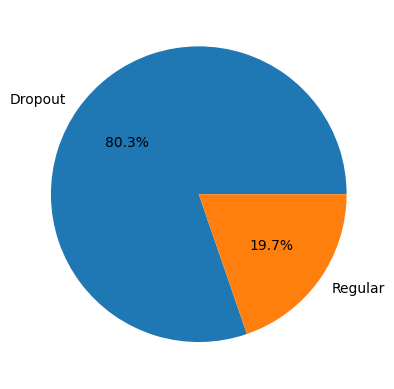

In [27]:
import matplotlib.pyplot as plt
labels = ['Dropout', 'Regular']

fig, ax = plt.subplots()
ax.pie(df.is_dropout.value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

In [28]:
df.ds_user_city.unique()

array([16, 17,  2,  8, 15,  6, 11,  9, 10, 19, 18,  1,  4, -1,  5, 14,  0,
        3,  7, 12, 13], dtype=int8)

In [29]:
import numpy as np
df.isin([np.inf, -np.inf]).sum()

ds_user_city                      0
n_days_since_firstaccess          0
n_days_since_lastaccess           0
n_assignments_flagged             0
n_assignments_mapped              0
n_forum_discussions_posted        0
n_quiz_abandoned                  0
n_quiz_finished                   0
vl_avg_quiz_speed                 0
vl_avg_graded_quiz_speed          0
vl_quiz_performance               0
n_interval_using                  0
n_days_using                      0
vl_avg_daily_activity             0
vl_user_engagement_by_interval    0
vl_user_engagement_intra_day      0
n_user_interactions               0
n_days_discussion_engagement      0
n_days_quiz_engagement            0
n_discussion_engagement           0
n_quiz_engagement                 0
n_questions_answered              0
n_questions_rigth                 0
n_questions_wrong                 0
n_questions_partial               0
vl_user_performance               0
vl_avg_questions_by_day           0
vl_grades_engagement        

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# , "n_days_since_lastaccess", "n_days_since_firstaccess"
X = df.drop(columns=["is_dropout", "n_days_since_lastaccess", "n_days_since_firstaccess", "n_interval_using", "n_days_using"])
y = df.is_dropout

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=df.is_dropout)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8741721854304636

In [56]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.9338842975206612

In [57]:
from sklearn.metrics import precision_recall_fscore_support

# Precision, Recall, f-betascore
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.9112903225806451, 0.9338842975206612, 0.9224489795918367, None)

Text(0.5, 0, 'Random Forest Feature Importance')

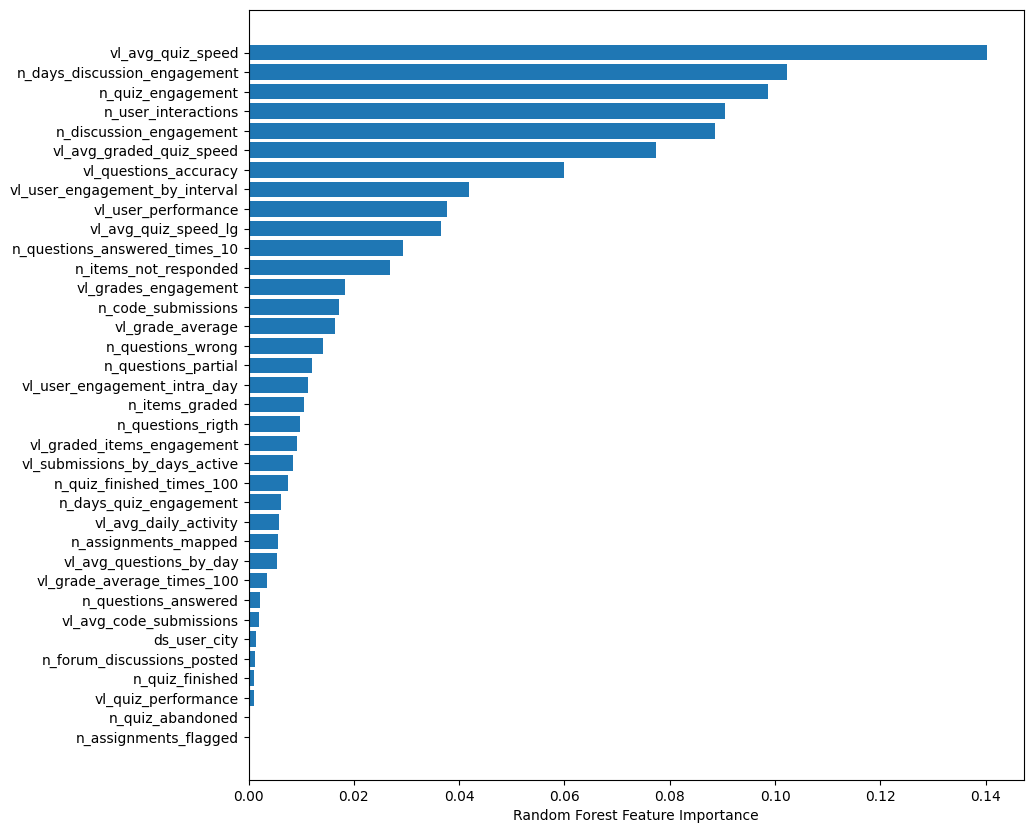

In [59]:
# plt.barh(X.columns, clf.feature_importances_)
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Elapsed time to compute the importances: 0.017 seconds


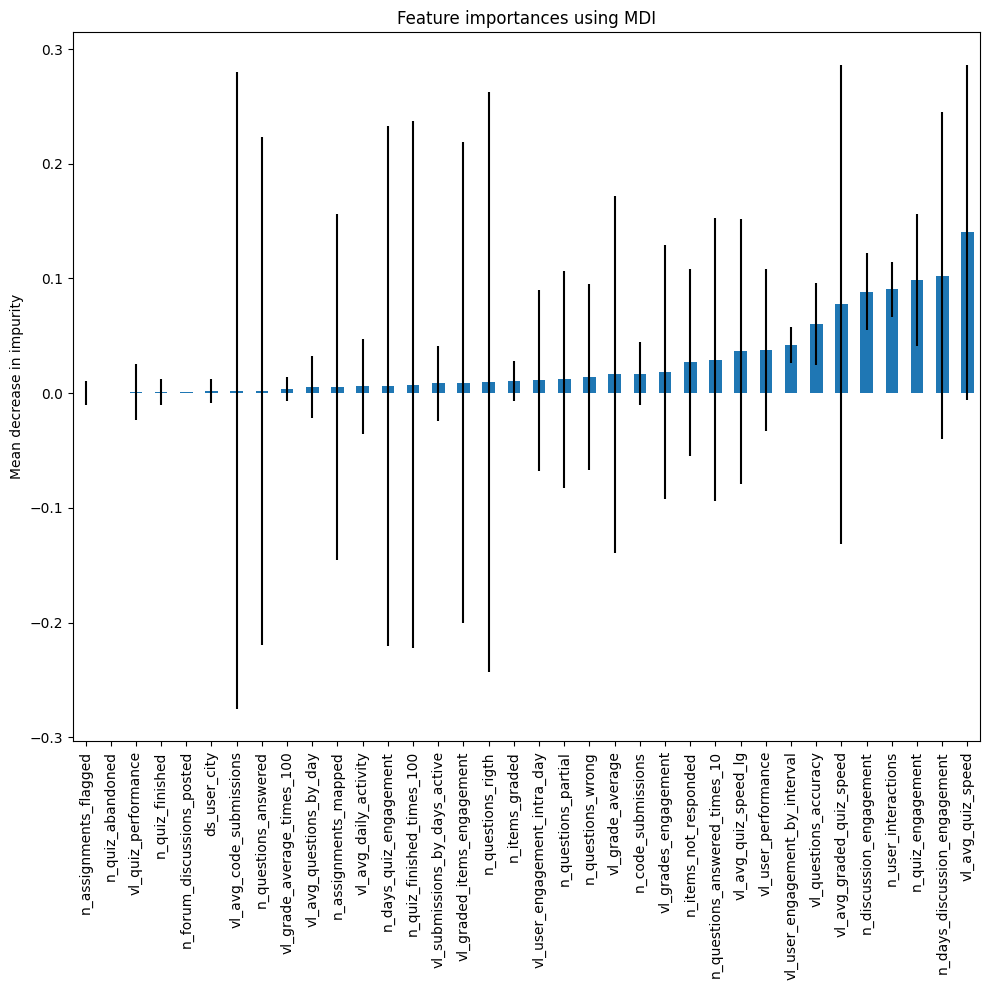

In [60]:
import time

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.sort_values().plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.rcParams['figure.figsize'] = [10, 10]


plt.show()

Text(0.5, 0, 'Permutation Importance')

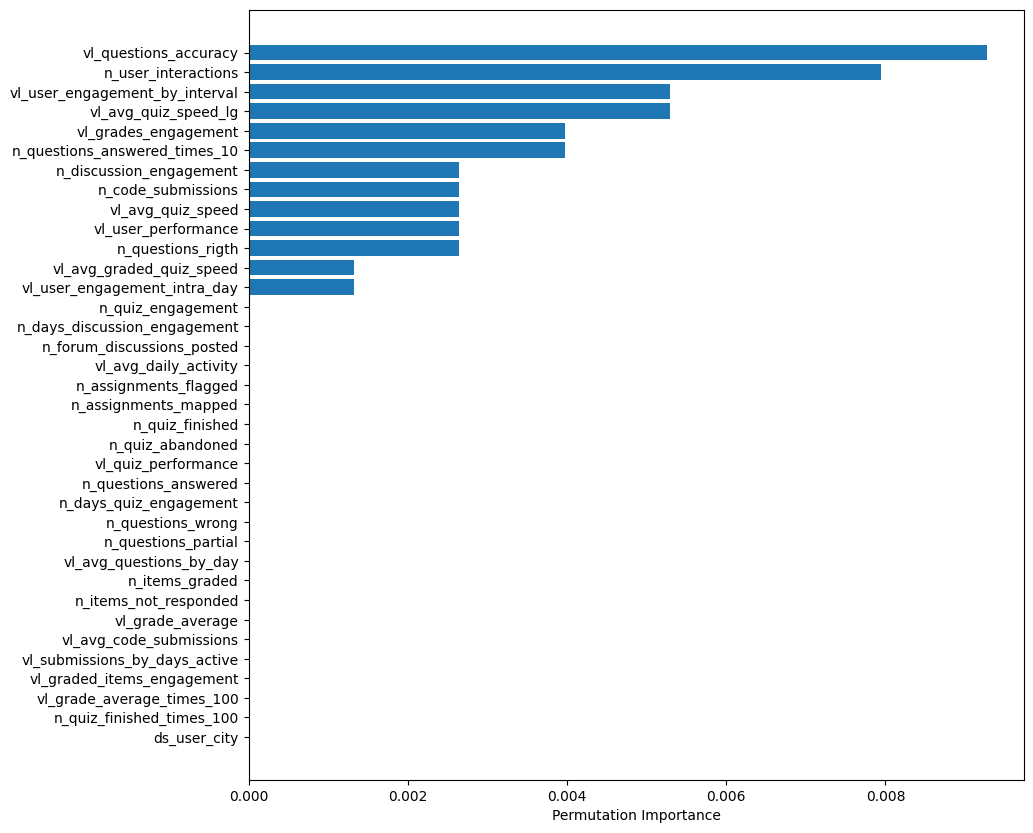

In [61]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [46]:
%pip install shap


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


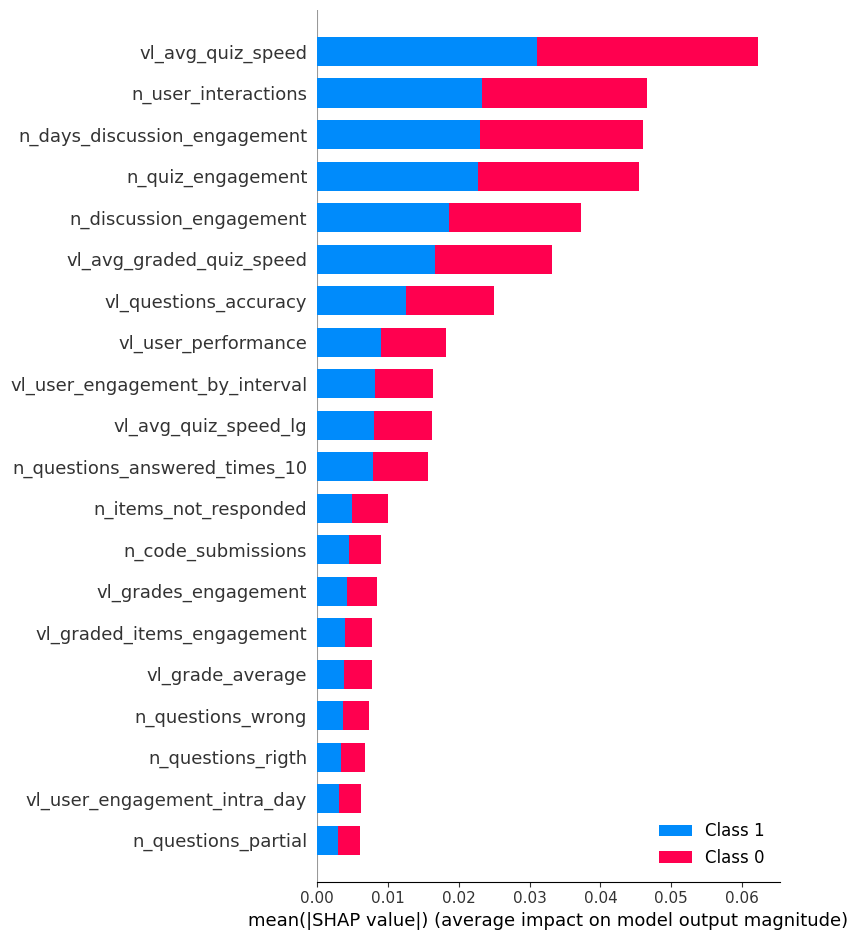

In [63]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

# Decision tree

In [64]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth=5)

clf_tree = clf_tree.fit(X_train, y_train)

y_tree_pred = clf_tree.predict(X_test)

print(accuracy_score(y_test, y_tree_pred))
print(precision_recall_fscore_support(y_test, y_tree_pred, average='binary'))

0.8278145695364238
(0.9130434782608695, 0.8677685950413223, 0.8898305084745762, None)


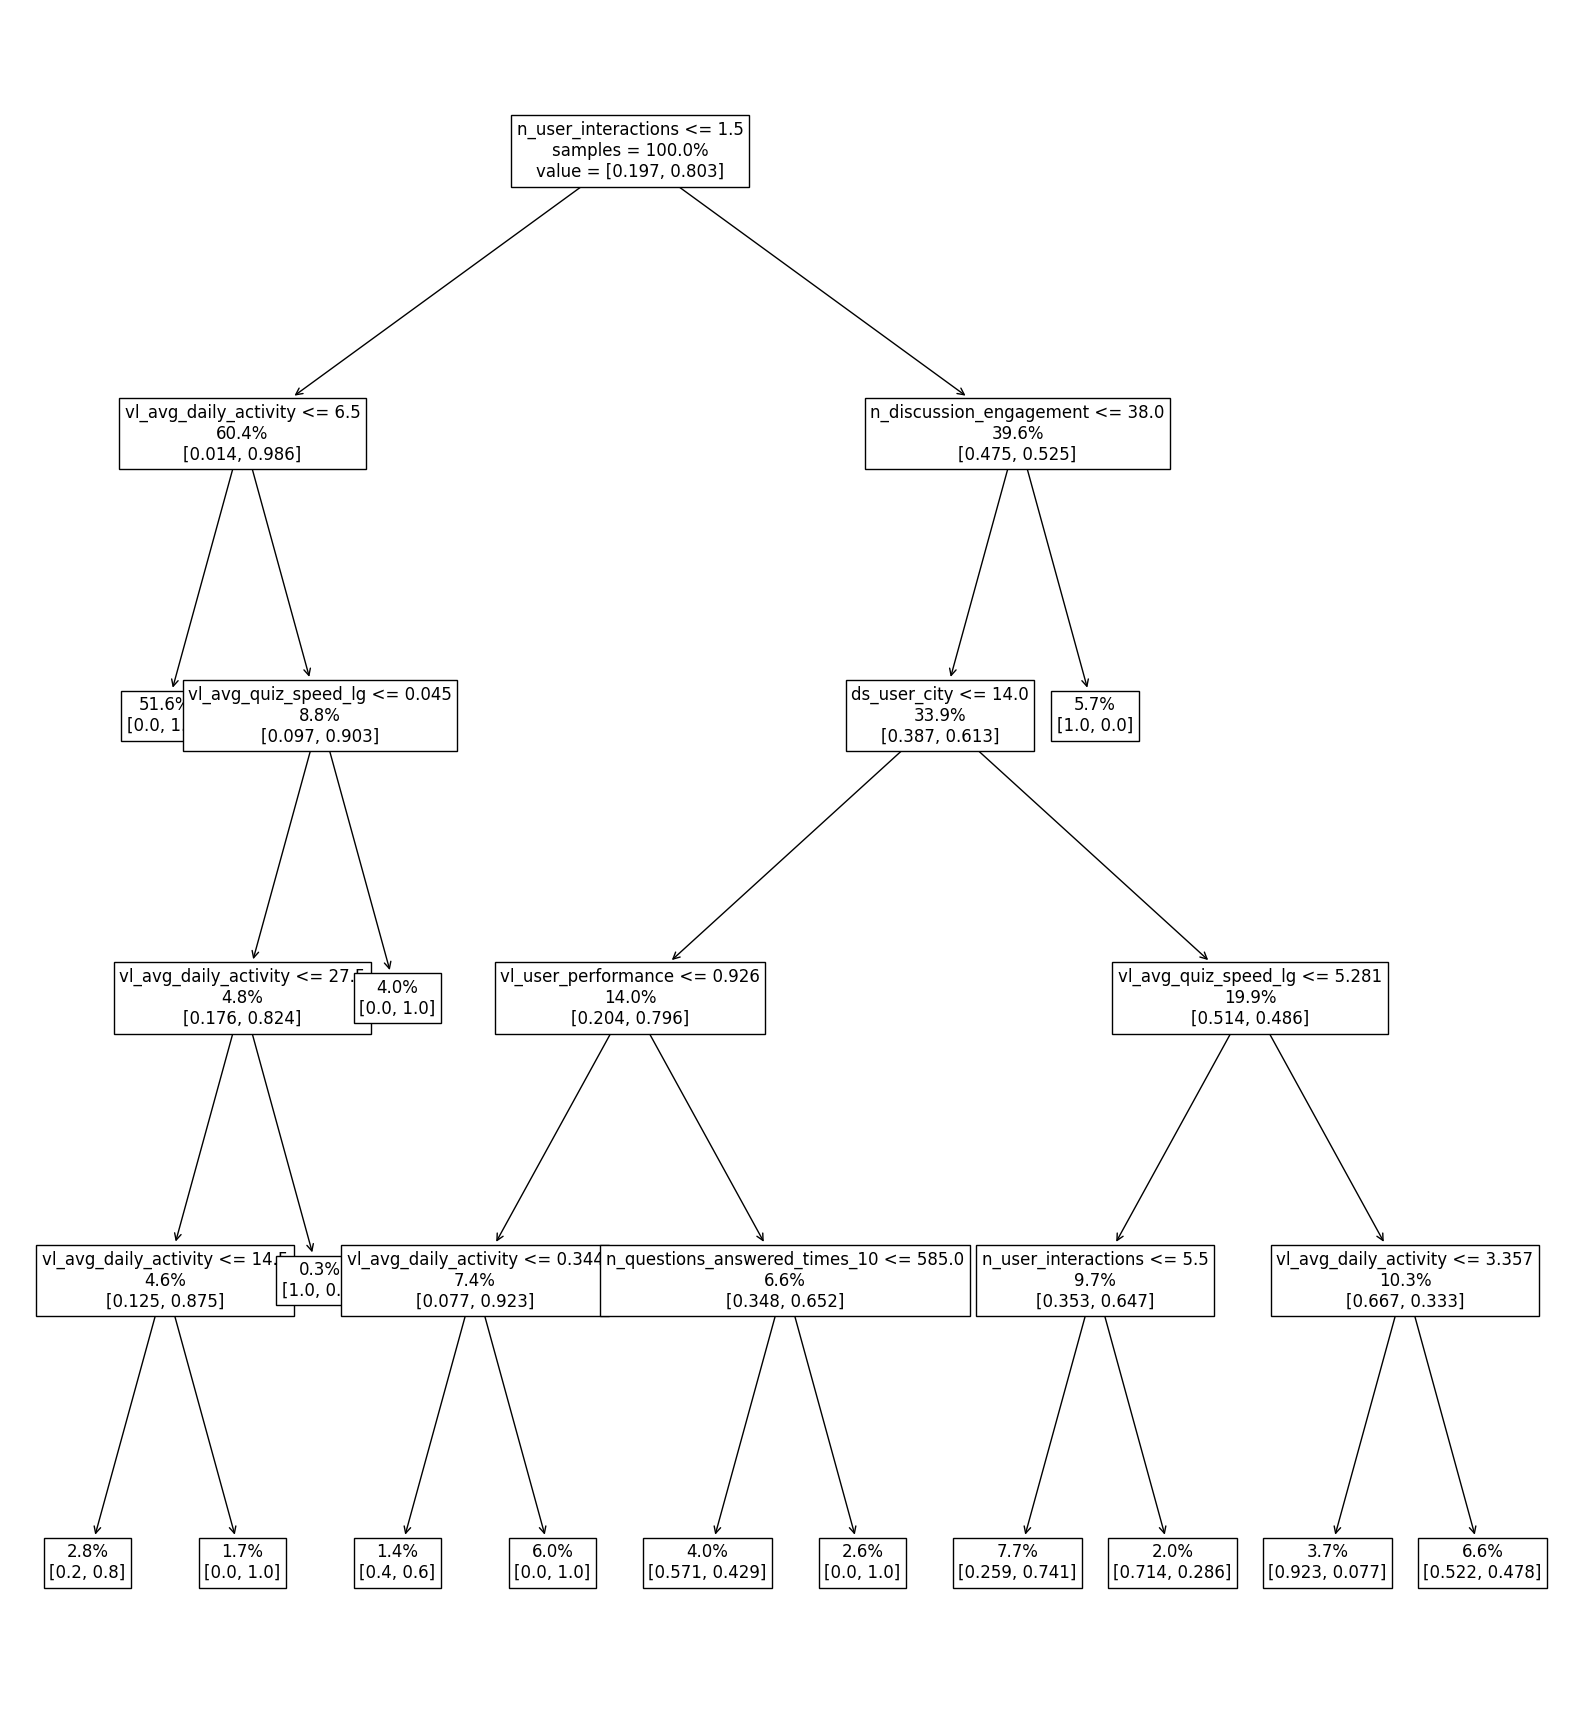

In [65]:
plt.figure(figsize=(20,22))
tree.plot_tree(clf_tree, feature_names=X.columns, impurity=False, fontsize=12, proportion=True, label='root')
plt.show()

In [66]:
perfil_regular = df.where((df.vl_avg_daily_activity > 1.458) & (df.vl_avg_graded_quiz_speed > 121.625))

In [67]:
perfil_regular.is_dropout.value_counts()

0.0    72
1.0    72
Name: is_dropout, dtype: int64

In [52]:
%pip install plotly


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [68]:
df[["vl_avg_daily_activity", "n_days_quiz_engagement", "n_items_not_responded", "vl_avg_quiz_speed", "vl_grade_average"]].describe()

# df["vl_grade_average_100"] = df["vl_grade_average"] * 100

vl_avg_daily_activity  n_days_quiz_engagement  n_items_not_responded  \
count             502.000000              502.000000             502.000000   
mean                7.363778                2.344622              23.492032   
std                15.659893                9.760135              56.571426   
min                 0.000000                0.000000               0.000000   
25%                 0.000000                0.000000               0.000000   
50%                 1.172800                0.000000               0.000000   
75%                 7.000000                1.000000              47.000000   
max               124.758200              133.000000             777.000000   

       vl_avg_quiz_speed  vl_grade_average  
count       5.020000e+02        502.000000  
mean        3.347180e+04          0.319644  
std         1.772173e+05          0.454515  
min         0.000000e+00          0.000000  
25%         0.000000e+00          0.000000  
50%         0.000000e+00          0.000000  
75%         7.512500e+02          0.954383  
max         2.372932e+06          1.000000

In [43]:
df = pd.read_csv("enter_tech_processed.csv")

In [69]:
df

ds_user_city  n_days_since_firstaccess  n_days_since_lastaccess  \
0              16                       466                       12   
1              17                       466                       21   
2              16                       432                        1   
3              17                       440                        0   
4               2                       433                       71   
..            ...                       ...                      ...   
497            16                     19662                    19662   
498            -1                        27                        4   
499            16                        15                        2   
500            16                     19662                    19662   
501            -1                        22                        2   

     n_assignments_flagged  n_assignments_mapped  n_forum_discussions_posted  \
0                        0                     9                           9   
1                        0                     4                          11   
2                        0                     0                           0   
3                        0                    35                           9   
4                       11                    27                           2   
..                     ...                   ...                         ...   
497                      0                     0                           0   
498                      0                     0                           0   
499                      0                     0                           0   
500                      0                     0                           0   
501                      0                     0                           0   

     n_quiz_abandoned  n_quiz_finished  vl_avg_quiz_speed  \
0                   3                2           224.0000   
1                   0                4           127.5000   
2                   0                2        213430.0000   
3                   0                1            20.0000   
4                   0               27        134816.2593   
..                ...              ...                ...   
497                 0                0             0.0000   
498                 0                2        256678.0000   
499                 0                2        571643.5000   
500                 0                0             0.0000   
501                 0                5         95553.0000   

     vl_avg_graded_quiz_speed  ...  n_code_submissions  \
0                    224.0000  ...                   0   
1                    166.3333  ...                  61   
2                     75.0000  ...                   0   
3                     20.0000  ...                   0   
4                 363847.7000  ...                   0   
..                        ...  ...                 ...   
497                    0.0000  ...                   0   
498               256678.0000  ...                   0   
499               571643.5000  ...                   0   
500                    0.0000  ...                   0   
501                32871.5000  ...                   7   

     vl_avg_code_submissions  vl_submissions_by_days_active  \
0                     0.0000                         0.0000   
1                     0.3697                         3.8125   
2                     0.0000                         0.0000   
3                     0.0000                         0.0000   
4                     0.0000                         0.0000   
..                       ...                            ...   
497                   0.0000                         0.0000   
498                   0.0000                         0.0000   
499                   0.0000                         0.0000   
500                   0.0000                         0.0000   
501                   0.0000                         7.0

In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['is_dropout'],
                   colorscale = [[0,'purple'],[1,'gold']]),
        dimensions = list([
            dict(range = [0,138],
                constraintrange = [4,8],
                label = 'AVG daily activity', values = df['vl_avg_daily_activity']),
            dict(range = [0,200],
                label = 'Items not responded', values = df['n_items_not_responded'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [70]:
df["vl_grade_average_times_100"] = df["vl_grade_average"] * 100
df["n_quiz_finished_times_100"] = df["n_quiz_finished"] * 100
df["n_questions_answered_times_10"] = df["n_questions_answered"] * 10

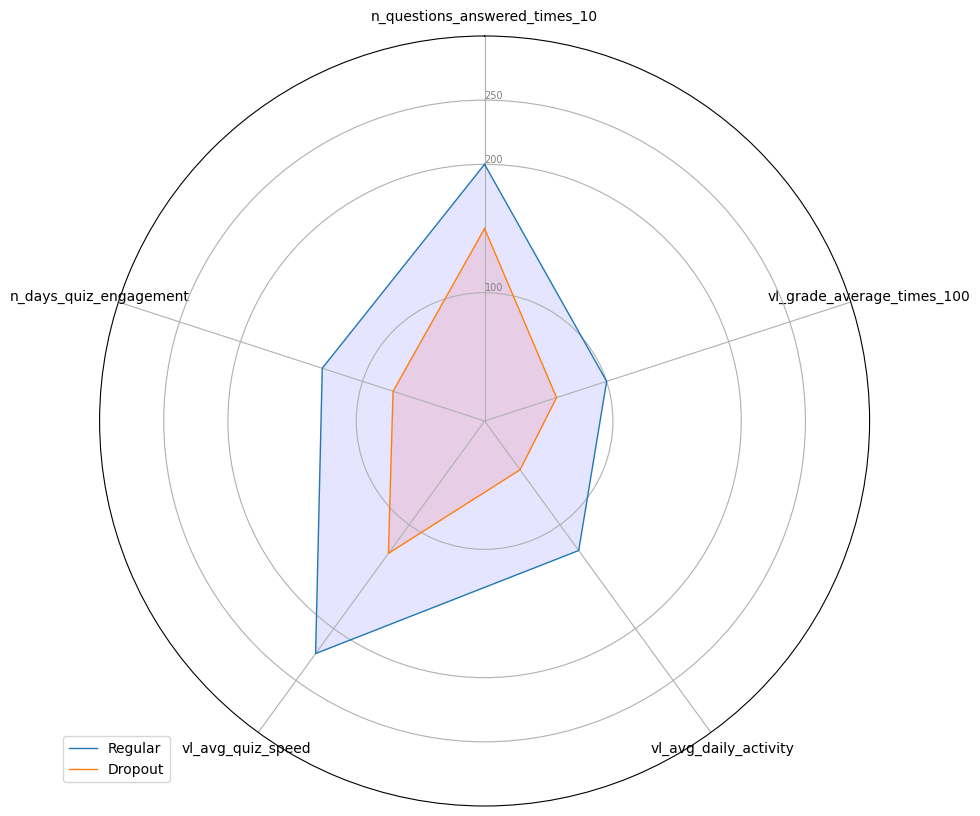

In [71]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
# df = pd.DataFrame({
# 'group': ['A','B','C','D'],
# 'var1': [38, 1.5, 30, 4],
# 'var2': [29, 10, 9, 34],
# 'var3': [8, 39, 23, 24],
# 'var4': [7, 31, 33, 14],
# 'var5': [28, 15, 32, 14]
# })

df_radar = df[["is_dropout", "n_questions_answered_times_10", "vl_grade_average_times_100", "vl_avg_daily_activity", "vl_avg_quiz_speed", "n_days_quiz_engagement"]]
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([100,200,250], ["100","200","250"], color="grey", size=7)
plt.ylim(0,300)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_radar.loc[0].drop('is_dropout').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Regular")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_radar.loc[1].drop('is_dropout').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Dropout")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [59]:
%pip install ydata-profiling


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [60]:
# from ydata_profiling import ProfileReport

In [61]:
# profile = ProfileReport(df, title="Profiling Report")

In [62]:
# profile

In [63]:
import seaborn as sns

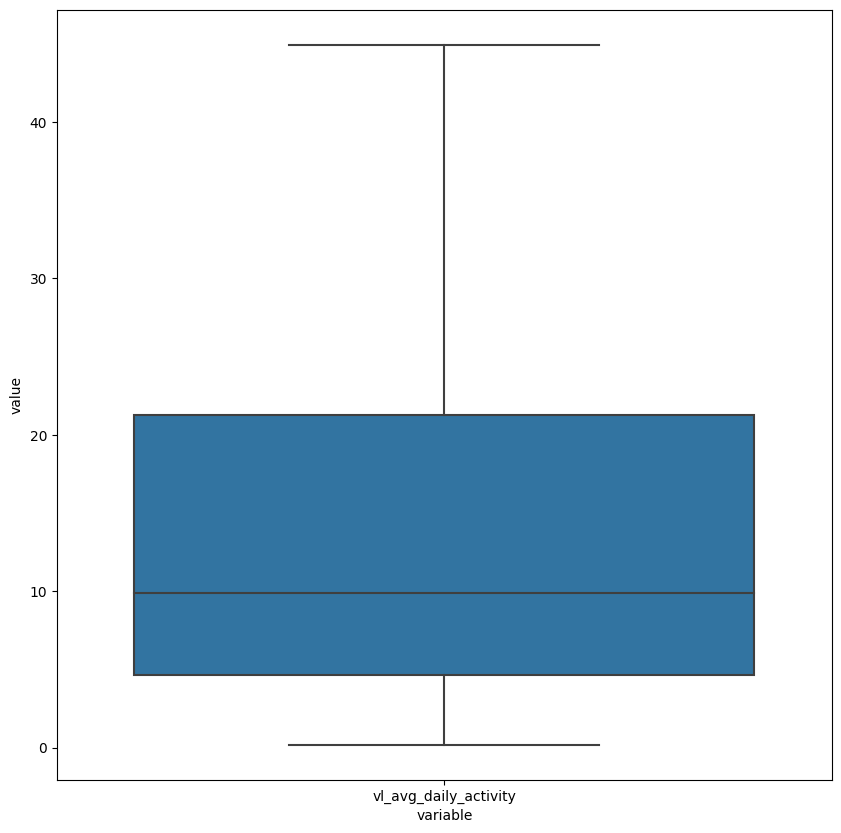

In [74]:
#melt data frame into long format
df_melted = pd.melt(df[["vl_avg_daily_activity"]].where(df.is_dropout == False))

sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False)
plt.show()

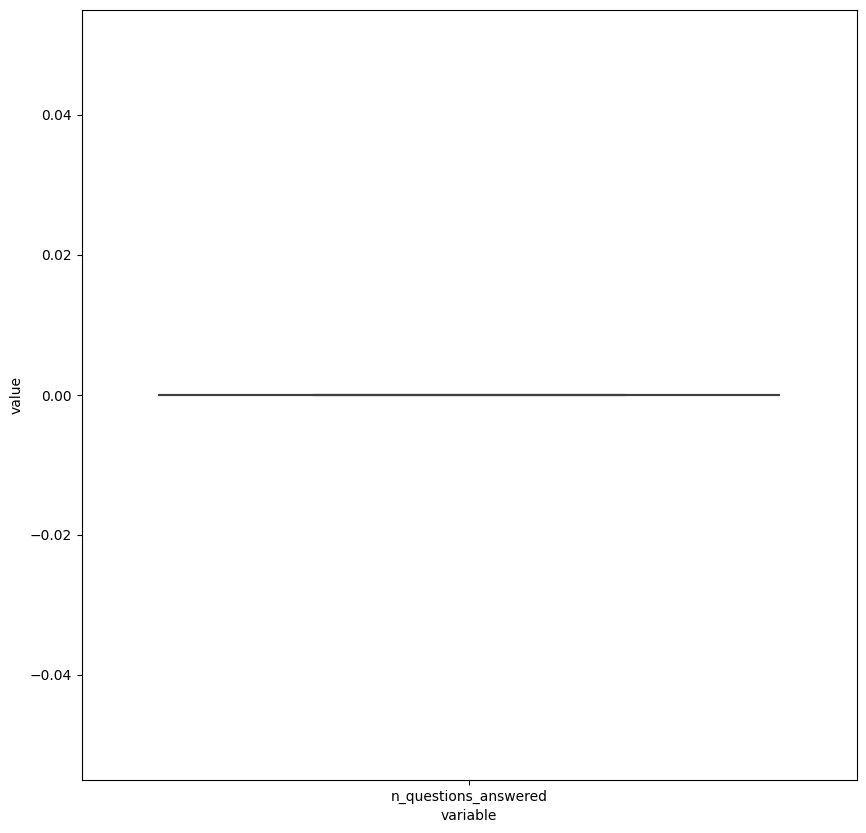

In [79]:
#melt data frame into long format
df_melted = pd.melt(df[["n_questions_answered"]].where(df.is_dropout == True))

sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False)
plt.show()

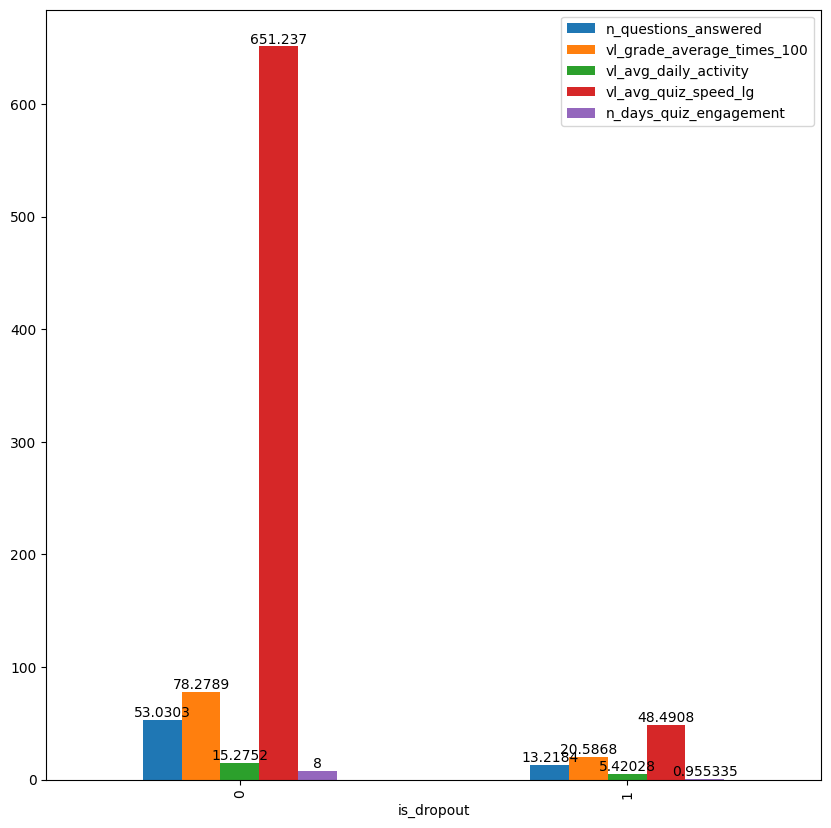

In [48]:
df["vl_avg_quiz_speed_lg"] = df["vl_avg_quiz_speed"] / 200

avgs = df[["is_dropout", "n_questions_answered", "vl_grade_average_times_100", "vl_avg_daily_activity", "vl_avg_quiz_speed_lg", "n_days_quiz_engagement"]].groupby("is_dropout").mean().plot(kind="bar")

for container in avgs.containers:
    avgs.bar_label(container)

In [101]:
# 